In [86]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [87]:
df = pd.read_csv('eds_incidents.csv', parse_dates=True, index_col='created_on', usecols=['created_on', 'description', 'seconds_to_resolve'])

In [88]:
df.sort_index(inplace=True)

**Remove all incidents that are not proper alerts**

In [90]:
df = df[(df['description'] != 'Test from EDS system')&(df['description'] != 'Ruapehu may have Erupted - Initiate Eruption response plan (M)')&(df['description'] != 'EDS - All Clear Msg for Skifields - Standdown.')&(df['description'] != '021756593')]

In [91]:
#Better descriptions
df['description'][df['description']=='Ruapehu may have Erupted - Initiate Eruption response plan'] = 'REDS'
df['description'][df['description']=='Tongariro may have Erupted - Initiate Eruption response plan'] = 'TEDS'
df['description'][df['description']=='EDS-Alert'] = 'Not distinguished (< 2015-10)'

/opt/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Pie plots**

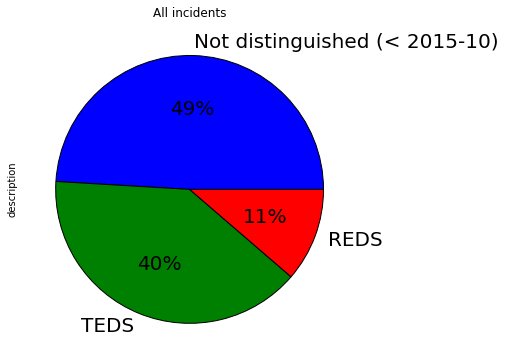

In [92]:
df['description'].value_counts().plot.pie(figsize=(6, 6), title='All incidents', fontsize=20, autopct='%.0f%%')

In [93]:
drt = df[df['description'] != 'Not distinguished (< 2015-10)']

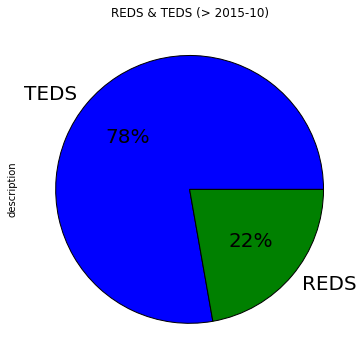

In [94]:
drt['description'].value_counts().plot.pie(figsize=(6, 6), title='REDS & TEDS (> 2015-10)',fontsize=20, autopct='%.0f%%' )

**Number REDS and TEDS Incidents (since 2015-10)**

In [100]:
drt['description'][drt['description']=='REDS'].count()

6

In [101]:
drt['description'][drt['description']=='TEDS'].count()

21

**Time occurrence**

In [95]:
drt['rt'] = 1

/opt/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


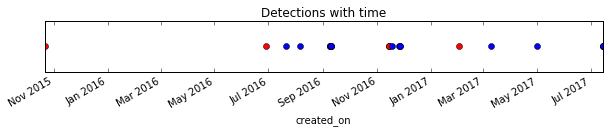

In [97]:
rt = drt[drt['description']=='REDS'].plot(y='rt', marker='o', linestyle='None', color='red', figsize=(10,1), legend=False, title='Detections with time')
fig = rt.get_figure()
ax = plt.gca()
ax.axes.get_yaxis().set_ticks([]) #turn off y-axis ticks
drt[drt['description']=='TEDS'].plot(y='rt', marker='o', linestyle='None', color='blue', legend=False, ax=rt)